# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Define Dataset

In [2]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df[df['Cholesterol'] < 100]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
98,56,M,ASY,120,85,0,Normal,140,N,0.0,Up,0
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [4]:
df[df['RestingBP'] < 90]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
314,53,M,ASY,80,0,0,Normal,141,Y,2.0,Down,0
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


# Exploratory Analysis

## Understand Dataset

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Dataset Overview

- **Number of Features:** 12
- **Feature Types:**
  - 5 categorical features
  - 6 numerical features
- **Target Type:**
  - Numerical feature
- **Missing Values:** None


**RestingBP** represents the resting blood pressure (mmHg).  
**Cholesterol** represents the serum cholesterol level (mg/dL).  
**FastingBS** indicates if fasting blood sugar is greater than 120 mg/dL.  
**RestingECG** results of the resting electrocardiogram test.  
**MaxHR** represents the maximum heart rate achieved.  
**ExerciseAngina** indicates if exercise-induced angina is present.  
**Oldpeak** represents the ST depression induced by exercise relative to rest (often used to measure ischemia).  
**ST_Slope** represents the slope of the peak exercise ST segment.  
**HeartDisease** is the target column

## Descriptive Analysis

### Numerical features

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Validate features Range**

- **Age**: 0 to 120 years  
  **Validated**

- **RestingBP (Resting Blood Pressure)**: 0 to 250 mmHg  
  - Typical systolic blood pressure values.  
  - *Values below 90 or above 200 are clinically abnormal.*
  **Validated**

- **Cholesterol**: 0 to 600 mg/dL  
  - Normal and extreme clinical levels.  
  - *Values above 300 are rare and usually indicate a serious condition.*  
  **Max observed: 603**

- **FastingBS (Fasting Blood Sugar)**: [0, 1]  
  - Binary indicator:  
    - `1` for fasting blood sugar > 120 mg/dL  
    - `0` otherwise.  
  **Validated**

- **MaxHR (Maximum Heart Rate)**: 0 to 220 bpm  
  - Calculated roughly as 220 minus age, though extremes are possible.  
  - *Typical values range from 60 bpm (resting) to around 200 bpm (during exercise).*
  
    **Validated**

- **Oldpeak**: 0 to 10.0  
  - Represents ST depression or elevation, typically measured in mm.  
  - *Values above 5.0 are rare and clinically significant.*  
  **Negative values observed.**

- **HeartDisease**: [0, 1]  
  - Binary indicator:  
    - `1` for presence of heart disease  
    - `0` for absence.


Values Outside the Expected Range:

- **Cholesterol**: Expected range from 0 to 600 mg/dL, but **603 mg/dL** was observed.
- **Oldpeak**: Expected range from 0 to 10.0, but **negative values** were observed.


#### Data correction

##### **Cholestrol**

In [8]:
df['Cholesterol'] [ df['Cholesterol'] > 600].count()

1

Only one value is outside the expected range, it will be dealt with it during outliers detection

##### **Oldpeak**

In [9]:
df['Oldpeak'] [ df['Oldpeak'] < 0].count()

13

Since *Oldpeak* cannot be negative, the negative values are considered entry errors and will be converted to positive values.

In [10]:
df['Oldpeak'] = df['Oldpeak'].abs()

### Categorical features

In [11]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())
    print()

Sex
['M' 'F']

ChestPainType
['ATA' 'NAP' 'ASY' 'TA']

RestingECG
['Normal' 'ST' 'LVH']

ExerciseAngina
['N' 'Y']

ST_Slope
['Up' 'Flat' 'Down']



**ChestPainType**:
ATA (Atypical Angina),
NAP (Non-Anginal Pain),
ASY (Asymptomatic),
TA (Typical Angina)

**RestingECG**:
Normal,
ST (ST-segment depression or elevation),
LVH (Left Ventricular Hypertrophy)

#### categories frequency

In [12]:
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())
    print()

Sex
M    725
F    193
Name: count, dtype: int64

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64



#### Inspecting infrequent categories

In [13]:
def detect_infrequent_categories(df, feature, threshold = 0.05*len(df)):
    value_counts = df[feature].value_counts()
    infrequent = value_counts[value_counts < threshold].index
    return infrequent

In [14]:
outliers = {}
for feature in df.select_dtypes(include=['object']):
    olist = detect_infrequent_categories(df, feature)
    outliers[feature] = olist
outliers

{'Sex': Index([], dtype='object', name='Sex'),
 'ChestPainType': Index([], dtype='object', name='ChestPainType'),
 'RestingECG': Index([], dtype='object', name='RestingECG'),
 'ExerciseAngina': Index([], dtype='object', name='ExerciseAngina'),
 'ST_Slope': Index([], dtype='object', name='ST_Slope')}

No outliers in categorical columns

## Drop duplicates

In [15]:
df.duplicated().sum()

0

We don't have duplicates

# Preprocessing

In [16]:
data = df.drop('HeartDisease', axis=1)

In [17]:
categorical_features = list(data.select_dtypes(include=['object']).columns)
numerical_features = list(data.select_dtypes(include=['number']).columns)
# Replace 0 values with NaN in the 'Cholesterol' column
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)
# Replace NaN values with the mean of the 'Cholesterol' column
df['Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].mean())

## Label Encoding

In [18]:
data[categorical_features]

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [19]:
label_encoder = LabelEncoder()
for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])

In [20]:
data[categorical_features]

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2
...,...,...,...,...,...
913,1,3,1,0,1
914,1,0,1,0,1
915,1,0,1,1,1
916,0,1,0,0,1


## Standardization

In [21]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [22]:
data[data.columns] = StandardScaler().fit_transform(data)
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,0.515952,0.229032,0.410909,0.825070,-0.551341,0.017255,1.382928,-0.823556,-0.878238,1.052114
1,-0.478484,-1.938163,1.275059,1.491752,-0.171961,-0.551341,0.017255,0.754157,-0.823556,0.081322,-0.596078
2,-1.751359,0.515952,0.229032,-0.129513,0.770188,-0.551341,1.601219,-1.525138,-0.823556,-0.878238,1.052114
3,-0.584556,-1.938163,-0.816995,0.302825,0.139040,-0.551341,0.017255,-1.132156,1.214246,0.561102,-0.596078
4,0.051881,0.515952,1.275059,0.951331,-0.034755,-0.551341,0.017255,-0.581981,-0.823556,-0.878238,1.052114
...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,0.515952,2.321086,-1.210356,0.596393,-0.551341,0.017255,-0.188999,-0.823556,0.273234,-0.596078
914,1.536902,0.515952,-0.816995,0.627078,-0.053049,1.813758,0.017255,0.164684,-0.823556,2.384267,-0.596078
915,0.370100,0.515952,-0.816995,-0.129513,-0.620168,-0.551341,0.017255,-0.857069,1.214246,0.273234,-0.596078
916,0.370100,-1.938163,0.229032,-0.129513,0.340275,-0.551341,-1.566710,1.461525,-0.823556,-0.878238,-0.596078


## Dimensionality Reduction (PCA)

In [23]:
pca = PCA(2).fit_transform(data)
pca

array([[ 2.28522673,  0.12470253],
       [ 1.14869747,  1.0758018 ],
       [ 1.12329994, -1.20393642],
       ...,
       [-1.65078575, -0.07483389],
       [ 1.73056537,  1.46702607],
       [ 2.50816008, -0.54018307]])

### PCA projection scatter plot

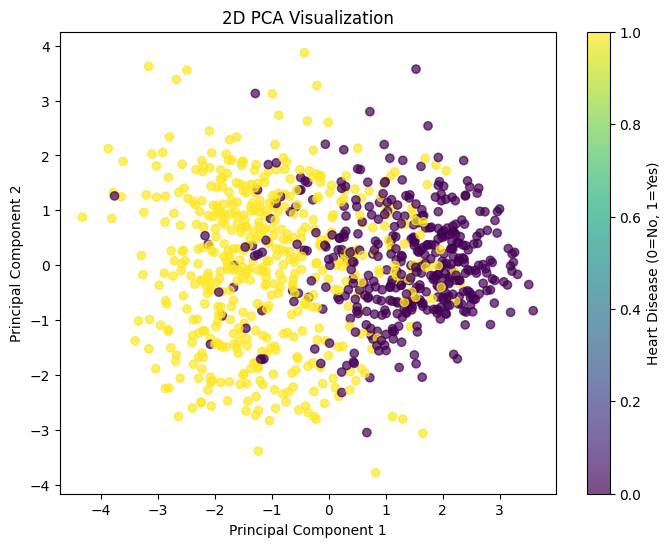

In [24]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca[:, 0], pca[:, 1], c=df['HeartDisease'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Heart Disease (0=No, 1=Yes)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Visualization')
plt.show()

## Handle Outliers

In [25]:
def detect_outliers(df, feature, threshold=3):
    z_scores = zscore(df[feature])
    outliers = (z_scores > abs(threshold))
    print(f"{outliers.sum()} outliers detected in '{feature}':")
    print(df[feature][outliers])
    print("-" * 50)
    return df[feature][outliers]

In [26]:
for feature in numerical_features:
    detect_outliers(data, feature)

0 outliers detected in 'Age':
Series([], Name: Age, dtype: float64)
--------------------------------------------------
7 outliers detected in 'RestingBP':
109    3.113018
241    3.653439
365    3.653439
399    3.653439
592    3.113018
732    3.653439
759    3.221102
Name: RestingBP, dtype: float64
--------------------------------------------------
3 outliers detected in 'Cholesterol':
76     3.020369
149    3.697252
616    3.340516
Name: Cholesterol, dtype: float64
--------------------------------------------------
0 outliers detected in 'FastingBS':
Series([], Name: FastingBS, dtype: float64)
--------------------------------------------------
0 outliers detected in 'MaxHR':
Series([], Name: MaxHR, dtype: float64)
--------------------------------------------------
6 outliers detected in 'Oldpeak':
166    3.919564
702    3.151916
771    4.495300
791    3.151916
850    5.071037
900    3.343828
Name: Oldpeak, dtype: float64
--------------------------------------------------


Since the outliers are meaningful and provide important insights (rare but valid in medical datasets),
they will be retained in the dataset.

# Training Classifiers

### Convert target to categorical

In [27]:
df['HeartDisease'] = df['HeartDisease'].map({0: 'No', 1: 'Yes'})
df['HeartDisease']

0       No
1      Yes
2       No
3      Yes
4       No
      ... 
913    Yes
914    Yes
915    Yes
916    Yes
917     No
Name: HeartDisease, Length: 918, dtype: object

### Split data into Train, Validation, and Test Sets

In [28]:
X = data
y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

Split data into training (80%), testing (20%)

Then training into training (80%), validation (20%)

64% training - 16% validation - 20% testing

### Evaluation functions

In [29]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    results = classification_report(y_true, y_pred)
    print(results)
    print("Accuracy:", accuracy_score(y_true, y_pred))

In [30]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_percentage, display_labels=np.unique(y_true))
    disp.plot(cmap='Blues', values_format=".2f")  # Display values with 2 decimal places
    plt.title(f"Confusion Matrix for {model_name} (Percentage)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

### Function to plot training and validation accuracy from GridSearchCV results

In [31]:
def plot_hyperparameter_results(grid_search, model_name):
    # Extract results
    results = grid_search.cv_results_

    # Get mean training and validation scores
    mean_train_scores = results['mean_train_score']  # Training accuracy
    mean_val_scores = results['mean_test_score']    # Validation accuracy
    param_combinations = results['params']          # Hyperparameter combinations

    # Create indices for each configuration
    indices = np.arange(len(param_combinations))

    # Plot training and validation accuracy
    plt.figure(figsize=(20, 7))
    plt.plot(indices, mean_train_scores, marker='o', linestyle='-', color='blue', label='Training Accuracy')
    plt.plot(indices, mean_val_scores, marker='o', linestyle='--', color='orange', label='Validation Accuracy')

    # Annotate configurations on the plot
    for i, params in enumerate(param_combinations):
        plt.text(indices[i], mean_val_scores[i], str(params), fontsize=7, rotation=45, ha='left', color='black')

    # Add labels, legend, and grid
    plt.xlabel('Hyperparameter Configuration Index')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy vs. Hyperparameter Configuration ({model_name})')
    plt.xticks(indices, labels=indices)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## SVM Classifier

### Training

#### Hyperparameter tuning for SVM

In [32]:
# Grids hyperparameter
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.01, 0.001]
}

In [33]:
# Set up GridSearchCV for SVM
svm_model = SVC(random_state=42)
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, scoring='f1_weighted', cv=5, return_train_score=True)

#### Fit model to get best hyperparameters

In [34]:
svm_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='f1_weighted')

#### Get best parameters

In [35]:
print("Best parameters for SVM:", svm_grid_search.best_params_)
best_svm_model = svm_grid_search.best_estimator_
y_val_pred_svm = best_svm_model.predict(X_val)

Best parameters for SVM: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


#### Plot training and validation accuracy verses Hyperprameters Tuning

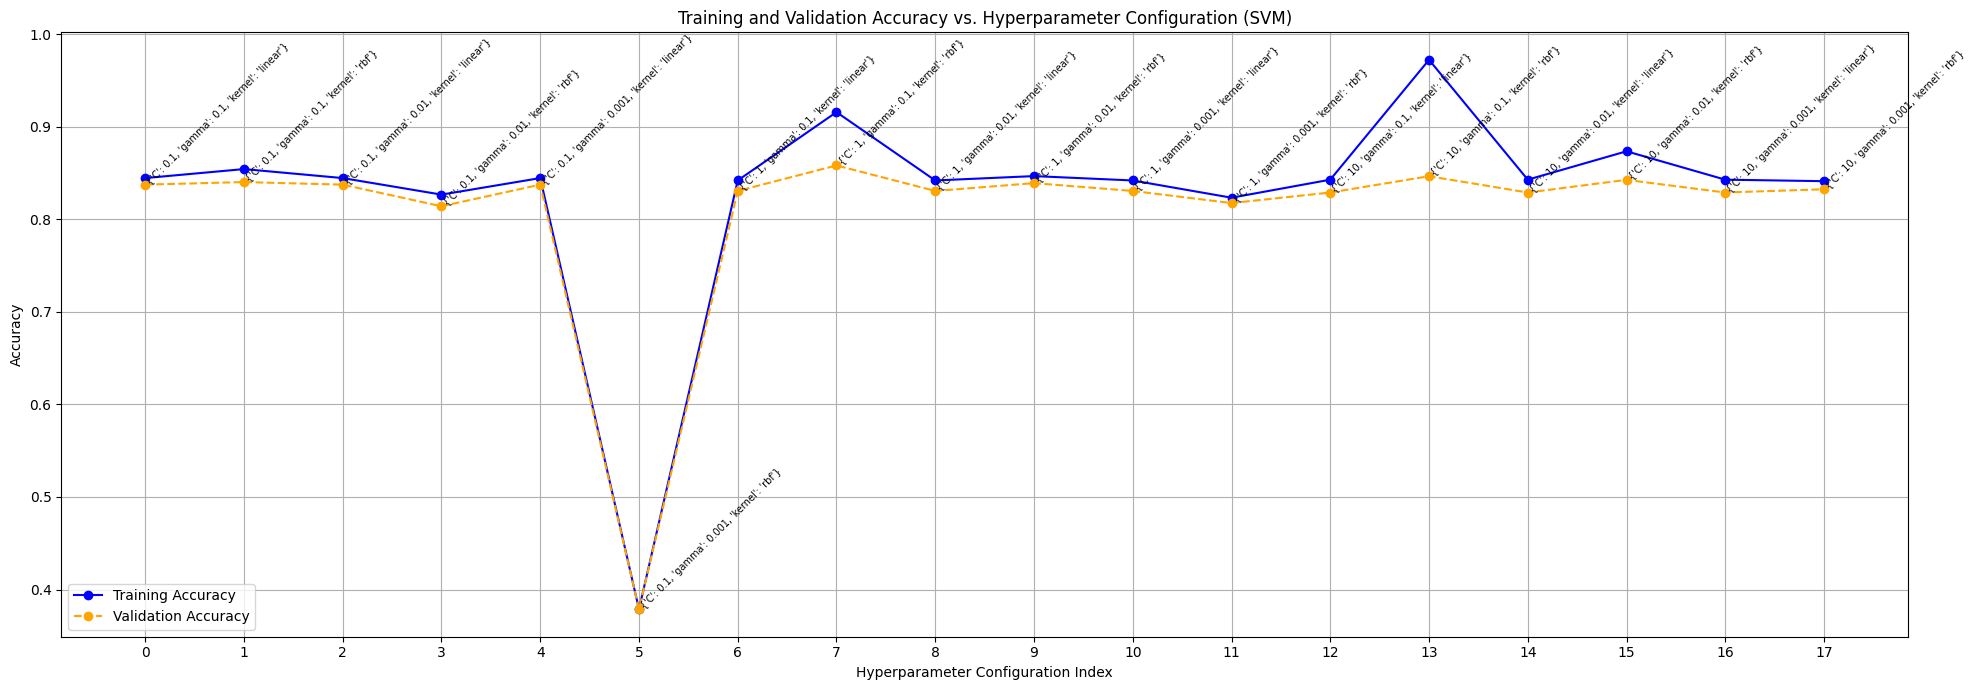

In [36]:
plot_hyperparameter_results(svm_grid_search, "SVM")

Configurations 7 and 12 show optimal accuracy but the training and validation accuracies in configuration 7 are closely aligned, indicating minimal overfitting - which has the same values of the best predicted hyperparameters




### Training Evaluation

#### Classification Report

In [37]:
evaluate_model(y_val, y_val_pred_svm, "Tuned SVM")


Tuned SVM Performance:
              precision    recall  f1-score   support

          No       0.86      0.83      0.85        66
         Yes       0.87      0.89      0.88        81

    accuracy                           0.86       147
   macro avg       0.86      0.86      0.86       147
weighted avg       0.86      0.86      0.86       147

Accuracy: 0.8639455782312925


#### Confusion Matrix

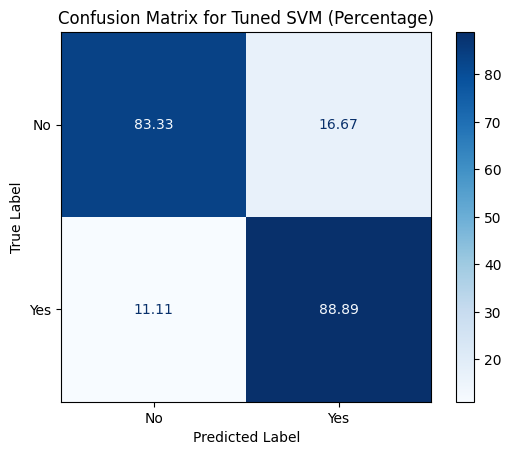

In [38]:
plot_confusion_matrix(y_val, y_val_pred_svm, "Tuned SVM")

### Testing Evaluation

#### Classification report

In [39]:
y_test_pred_svm = best_svm_model.predict(X_test)
evaluate_model(y_test, y_test_pred_svm, "Tuned SVM")


Tuned SVM Performance:
              precision    recall  f1-score   support

          No       0.89      0.89      0.89        74
         Yes       0.93      0.93      0.93       110

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184

Accuracy: 0.9130434782608695


#### Confusion Matrix

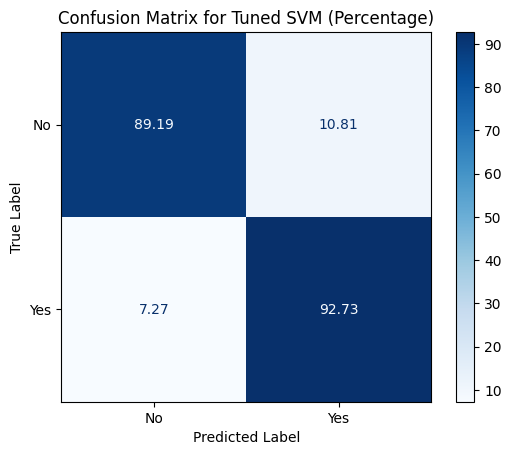

In [40]:
plot_confusion_matrix(y_test, y_test_pred_svm, "Tuned SVM")

## Bayes Classifier

### Training

#### Hyperparameter tuning for Bayes

In [41]:
# Define hyperparameter grids for Naive Bayes
nb_param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

In [42]:
# Set up GridSearchCV for Naïve Bayes
nb_model = GaussianNB()
nb_grid_search = GridSearchCV(estimator=nb_model, param_grid=nb_param_grid, scoring='f1_weighted', cv=5,return_train_score=True)

#### Fit model to get best hyperparameters

In [43]:
nb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},
             return_train_score=True, scoring='f1_weighted')

#### Get best parameters

In [44]:
print("Best parameters for Naïve Bayes:", nb_grid_search.best_params_)
best_nb_model = nb_grid_search.best_estimator_
y_val_pred_nb = best_nb_model.predict(X_val)

Best parameters for Naïve Bayes: {'var_smoothing': 1e-09}


#### Plot training and validation accuracy verses Hyperprameters Tuning

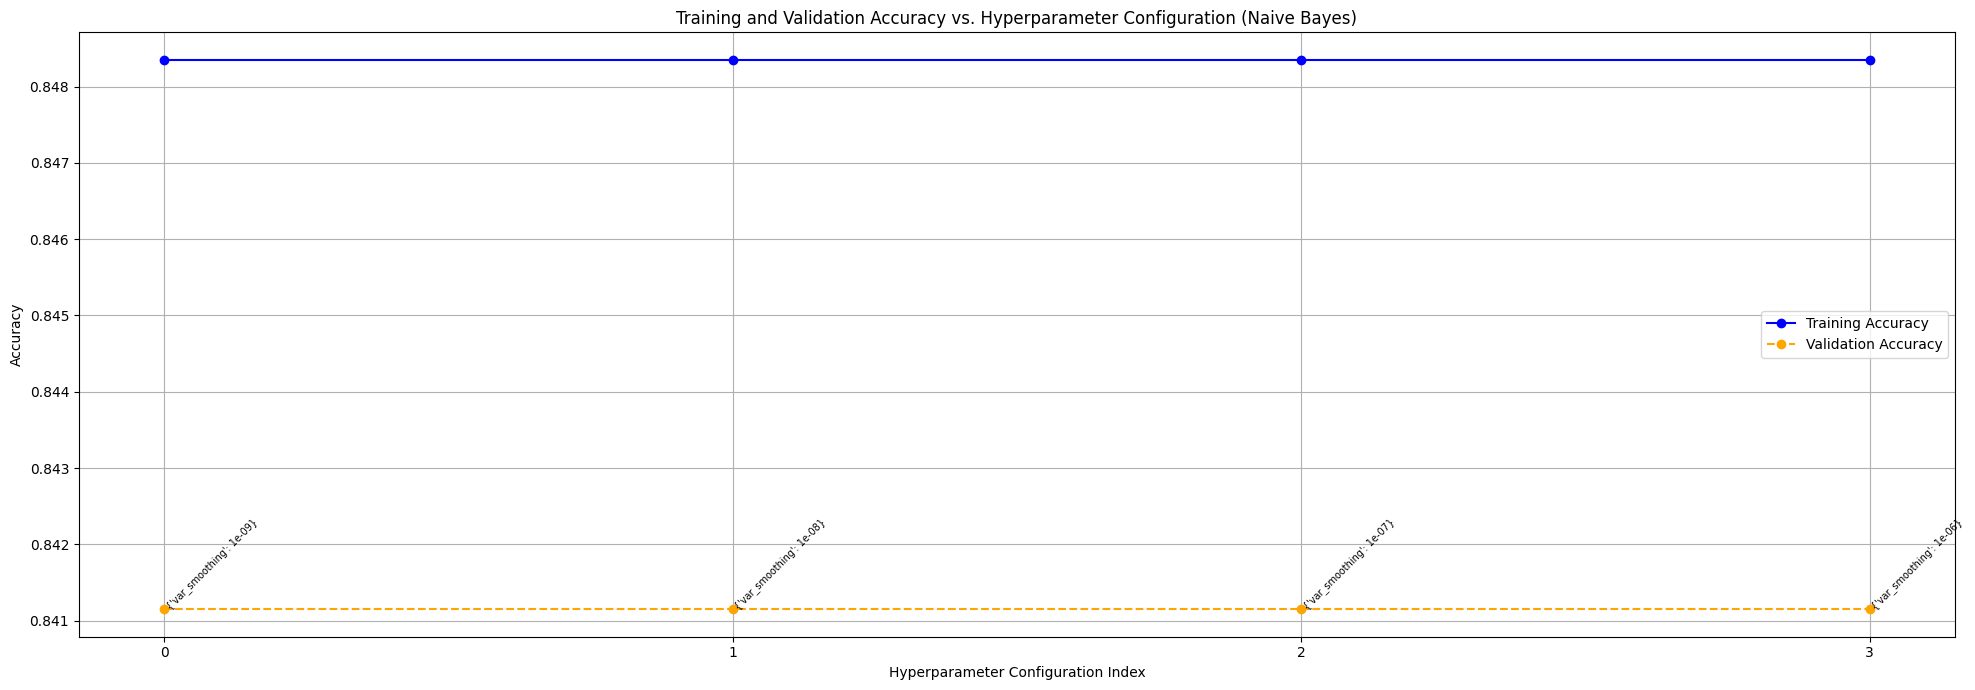

In [45]:
plot_hyperparameter_results(nb_grid_search, "Naive Bayes")

### Training Evaluation

#### Classification Report

In [46]:
evaluate_model(y_val, y_val_pred_nb, "Tuned Naïve Bayes")


Tuned Naïve Bayes Performance:
              precision    recall  f1-score   support

          No       0.83      0.88      0.85        66
         Yes       0.90      0.85      0.87        81

    accuracy                           0.86       147
   macro avg       0.86      0.87      0.86       147
weighted avg       0.87      0.86      0.86       147

Accuracy: 0.8639455782312925


#### Confusion Matrix

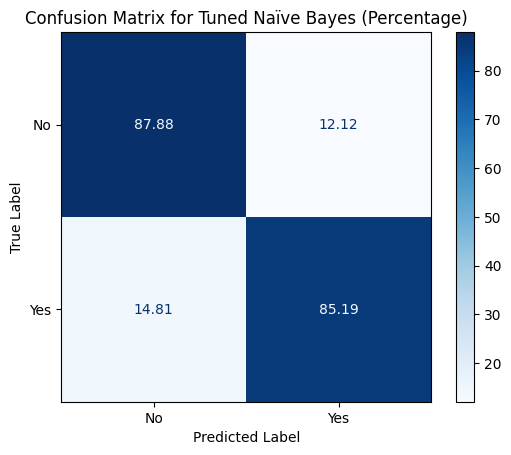

In [47]:
plot_confusion_matrix(y_val, y_val_pred_nb, "Tuned Naïve Bayes")

### Testing Evaluation

#### Classification report

In [48]:
y_test_pred_nb = best_nb_model.predict(X_test)
report_test_nb = evaluate_model(y_test, y_test_pred_nb, "Tuned Naïve Bayes")


Tuned Naïve Bayes Performance:
              precision    recall  f1-score   support

          No       0.86      0.88      0.87        74
         Yes       0.92      0.90      0.91       110

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

Accuracy: 0.8913043478260869


#### Confusion Matrix

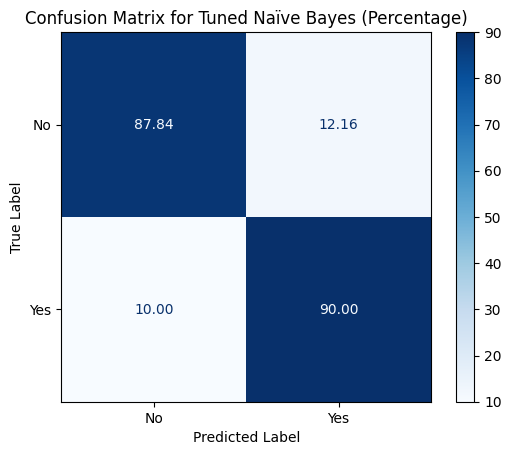

In [49]:
plot_confusion_matrix(y_test, y_test_pred_nb, "Tuned Naïve Bayes")

## KNN Classifier

### Training

#### Hyperprameters tuning for KNN

In [50]:
# Define a dictionary for hyperparameter tuning
knn_param_grid = {
    # List of possible values for the number of neighbors to consider during classification
    'n_neighbors': [3, 5, 7, 9, 11],

    # Set the 'weights' parameter to 'uniform', meaning each neighbor has an equal weight in the prediction
    'weights': ['uniform'],

    # List of distance metrics to use when calculating the distance between data points
    'metric': ['euclidean', 'manhattan']
}

#### Grid Search for Hyperparameters

In [51]:
# Create KNN classifier model
knn_model = KNeighborsClassifier()

# Set up GridSearchCV to search for the best hyperparameters
knn_grid_search = GridSearchCV(
    estimator=knn_model,                # KNN model
    param_grid=knn_param_grid,          # Hyperparameter grid to search
    scoring='f1_weighted',              # Use F1 weighted score as evaluation metric
    cv=5,                               # 5-fold cross-validation
    return_train_score=True             # Return training scores
)

#### Fit model to get best hyperparameters

In [52]:
knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform']},
             return_train_score=True, scoring='f1_weighted')

#### Best Hyperparameters

In [53]:
best_knn_model = knn_grid_search.best_estimator_
knn_grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

#### Plot training and validation accuracy verses Hyperprameters Tuning

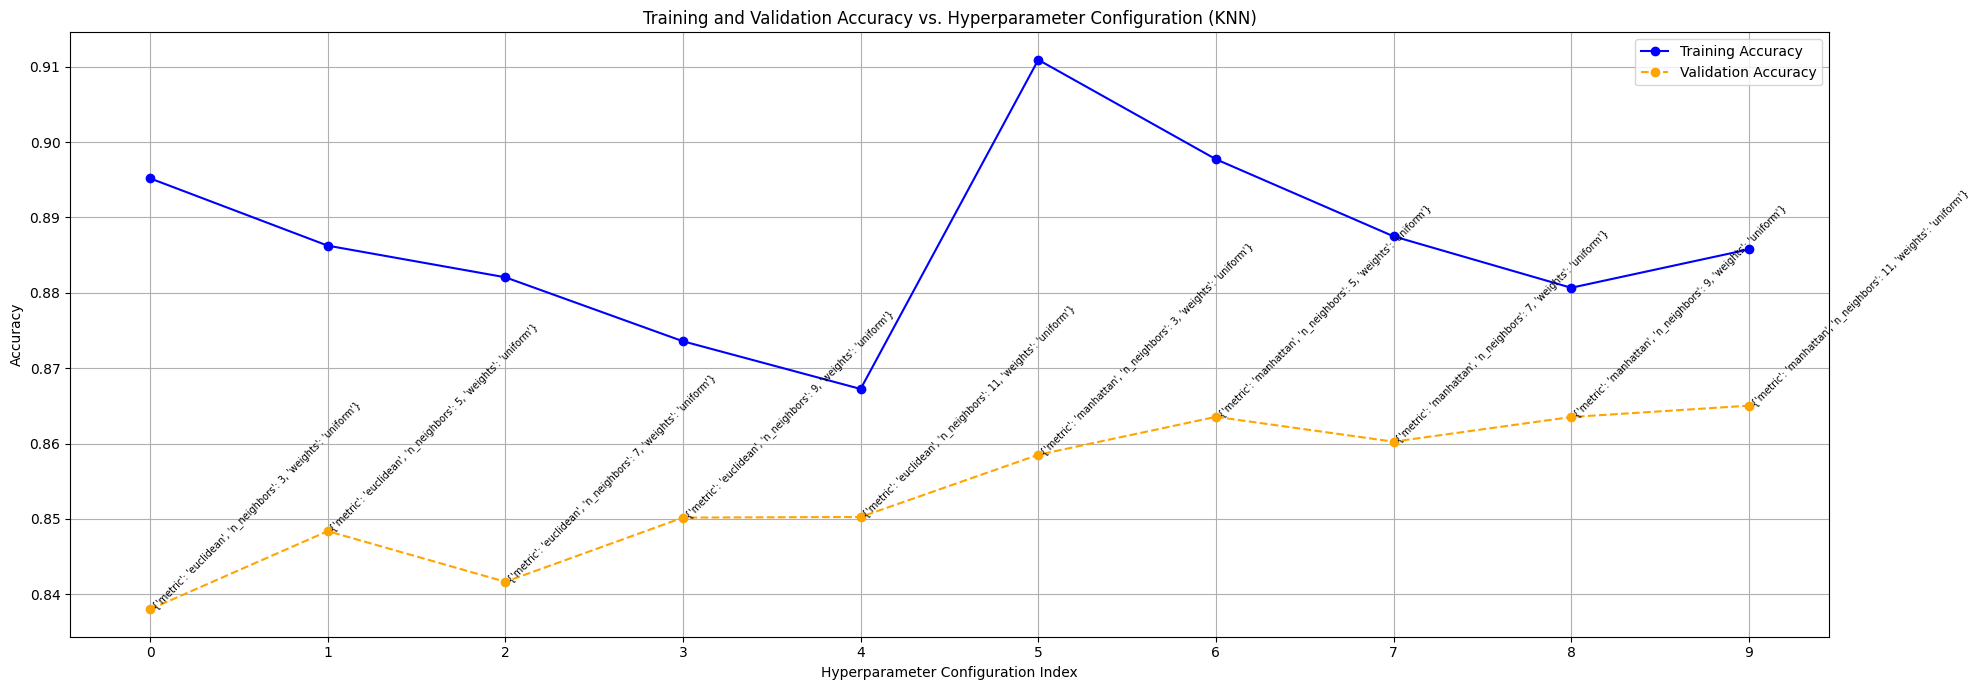

In [54]:
plot_hyperparameter_results(knn_grid_search, "KNN")

### Training Evaluation

#### Classification Report

In [55]:
# Predict labels for the validation set using the best KNN model
y_val_pred_knn = best_knn_model.predict(X_val)
# Evaluate the performance of the tuned KNN model on validation set
evaluate_model(y_val, y_val_pred_knn, "Tuned KNN")


Tuned KNN Performance:
              precision    recall  f1-score   support

          No       0.85      0.86      0.86        66
         Yes       0.89      0.88      0.88        81

    accuracy                           0.87       147
   macro avg       0.87      0.87      0.87       147
weighted avg       0.87      0.87      0.87       147

Accuracy: 0.8707482993197279


#### Confusion Matrix

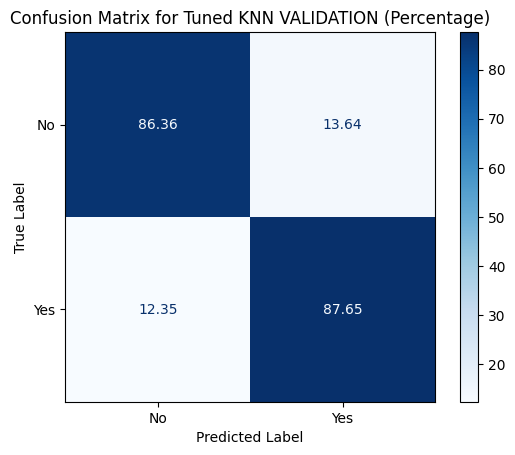

In [56]:
# Plot confusion matrix for KNN on the validation set
plot_confusion_matrix(y_val, y_val_pred_knn, "Tuned KNN VALIDATION")

### Testing Evaluation

#### Classification Report

In [57]:
# Predict labels for the test set using the best KNN model
y_test_pred_knn = best_knn_model.predict(X_test)
# Evaluate the performance of the tuned KNN model on the test set
report_test_knn = evaluate_model(y_test, y_test_pred_knn, "Tuned KNN")


Tuned KNN Performance:
              precision    recall  f1-score   support

          No       0.84      0.88      0.86        74
         Yes       0.92      0.89      0.90       110

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

Accuracy: 0.8858695652173914


#### Confusion Matrix

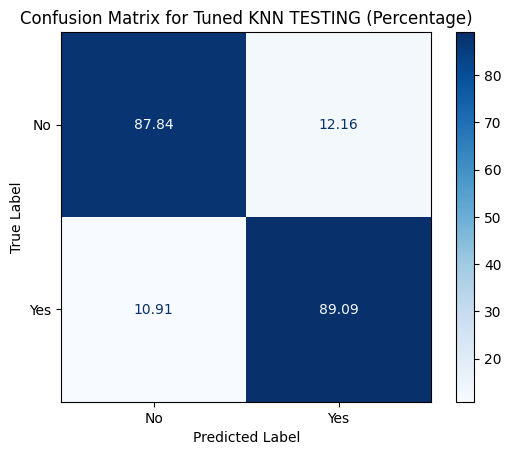

In [58]:
# Plot confusion matrix for KNN on the test set
plot_confusion_matrix(y_test, y_test_pred_knn, "Tuned KNN TESTING")

## Decision Tree Classifier

### Training

#### HyperPrameters For Decision Tree

In [59]:
# Hyperparameter grid for tuning the Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],    # Use both Gini impurity and entropy for splitting nodes
    'max_depth': [3, 4, 5],               # Test different maximum depths of the tree
    'min_samples_split': [35, 45],        # Minimum samples required to split an internal node
    'min_samples_leaf': [15, 20],         # Minimum samples required to be at a leaf node
    'ccp_alpha': [0.02, 0.04]            # Pruning parameter to control overfitting
}

#### Grid Search for hyperprameters

In [60]:
# Initialize the Decision Tree model with a fixed random seed for reproducibility
dt_model = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV to tune hyperparameters with 5-fold cross-validation
dt_grid_search = GridSearchCV(
    estimator=dt_model,                # Decision Tree model
    param_grid=dt_param_grid,           # Hyperparameter grid for tuning
    scoring='accuracy',                 # Evaluate model based on accuracy score
    cv=5,                               # 5-fold cross-validation
    return_train_score=True,            # Return training scores
    n_jobs=-1,                          # Use all CPU cores for parallel processing
    verbose=2                           # Display progress during the search
)

#### Fit model to get e best hyperparameters

In [61]:
dt_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0.02, 0.04],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [15, 20],
                         'min_samples_split': [35, 45]},
             return_train_score=True, scoring='accuracy', verbose=2)

#### Best Hyperparameters

In [62]:
# Get the best model based on the grid search
best_dt_model = dt_grid_search.best_estimator_
dt_grid_search.best_params_

{'ccp_alpha': 0.02,
 'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 20,
 'min_samples_split': 35}

#### Plot training and validation accuracy verses Hyperprameters Tuning

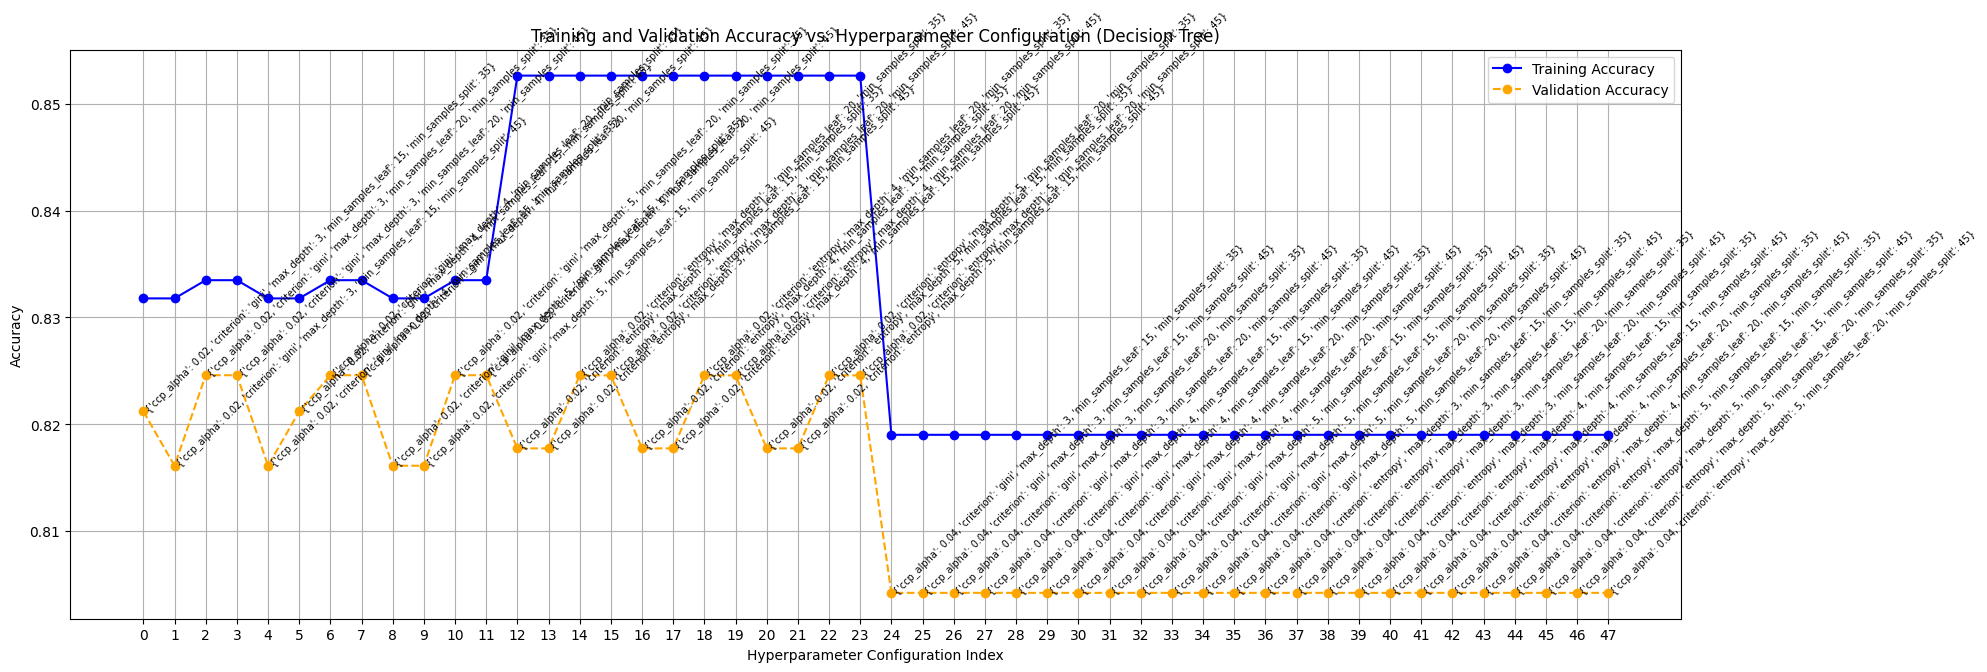

In [63]:
plot_hyperparameter_results(dt_grid_search, "Decision Tree")

### Training Evaluation

#### Classification Report

In [64]:
# Predict labels for the validation set using the best Decision Tree model
y_val_pred_dt = best_dt_model.predict(X_val)
# Evaluate the model on the validation set
evaluate_model(y_val, y_val_pred_dt, "Tuned Decision Tree")


Tuned Decision Tree Performance:
              precision    recall  f1-score   support

          No       0.82      0.71      0.76        66
         Yes       0.79      0.88      0.83        81

    accuracy                           0.80       147
   macro avg       0.81      0.79      0.80       147
weighted avg       0.80      0.80      0.80       147

Accuracy: 0.8027210884353742


#### Confusion Matrix  

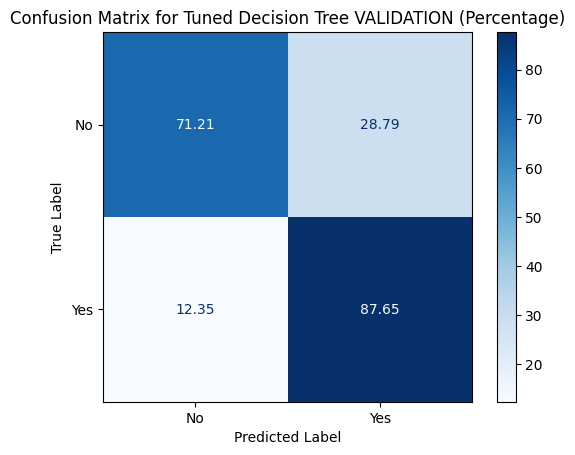

In [65]:
# Plot the confusion matrix for the Decision Tree model on the validation set
plot_confusion_matrix(y_val, y_val_pred_dt, "Tuned Decision Tree VALIDATION")

### Testing Evaluation

#### Classification Report

In [66]:
# Predict labels for the test set using the best Decision Tree model
y_test_pred_dt = best_dt_model.predict(X_test)
# Evaluate the model on the test set
report_test_dt = evaluate_model(y_test, y_test_pred_dt, "Tuned Decision Tree")


Tuned Decision Tree Performance:
              precision    recall  f1-score   support

          No       0.89      0.78      0.83        74
         Yes       0.87      0.94      0.90       110

    accuracy                           0.88       184
   macro avg       0.88      0.86      0.87       184
weighted avg       0.88      0.88      0.87       184

Accuracy: 0.875


#### Confusion Matrix

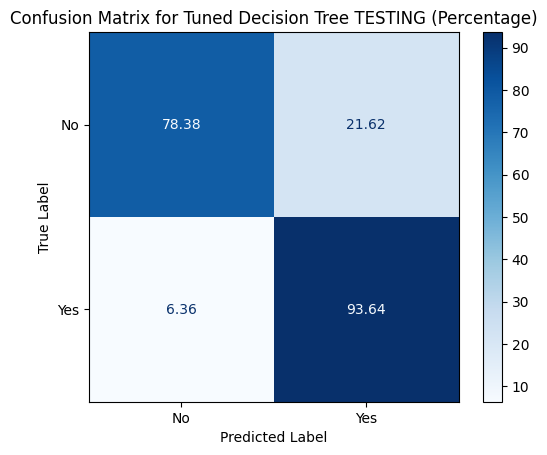

In [67]:
# Plot the confusion matrix for the Decision Tree model on the test set
plot_confusion_matrix(y_test, y_test_pred_dt, "Tuned Decision Tree TESTING")

## Models Comparisions

In [68]:
# Extract weighted average metrics
metrics = ["precision", "recall", "f1-score"]
x_labels = ["Precision", "Recall", "F1-Score"]

In [69]:
# To plot histogram
x = np.arange(len(metrics))
width = 0.15

### Validation Weighted Metrics

In [70]:
### Classification reports for validation
report_val_svm = classification_report(y_val, y_val_pred_svm, output_dict=True)
report_val_nb = classification_report(y_val, y_val_pred_nb, output_dict=True)
report_val_knn = classification_report(y_val, y_val_pred_knn, output_dict=True)
report_val_dt = classification_report(y_val, y_val_pred_dt, output_dict=True)

In [71]:
# Validation metrics
svm_val_metrics = [report_val_svm["weighted avg"][metric] for metric in metrics]
nb_val_metrics = [report_val_nb["weighted avg"][metric] for metric in metrics]
knn_val_metrics = [report_val_knn["weighted avg"][metric] for metric in metrics]
dt_val_metrics = [report_val_dt["weighted avg"][metric] for metric in metrics]

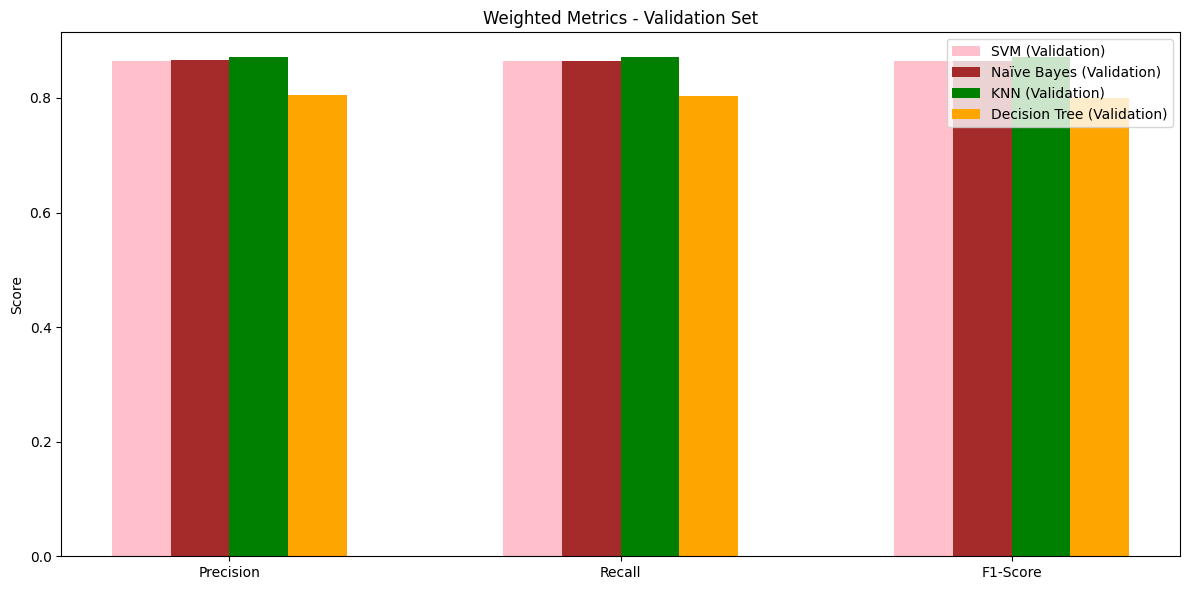

In [72]:
plt.figure(figsize=(12, 6))
plt.bar(x - 1.5 * width, svm_val_metrics, width, label="SVM (Validation)", color='pink')
plt.bar(x - 0.5 * width, nb_val_metrics, width, label="Naïve Bayes (Validation)", color='brown')
plt.bar(x + 0.5 * width, knn_val_metrics, width, label="KNN (Validation)", color='green')
plt.bar(x + 1.5 * width, dt_val_metrics, width, label="Decision Tree (Validation)", color='orange')

plt.ylabel("Score")
plt.title("Weighted Metrics - Validation Set")
plt.xticks(x, x_labels)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

### Testing Weighted Metrics

In [73]:
# classification reports for testing
report_test_svm = classification_report(y_test, y_test_pred_svm, output_dict=True)
report_test_nb = classification_report(y_test, y_test_pred_nb, output_dict=True)
report_test_knn = classification_report(y_test, y_test_pred_knn, output_dict=True)
report_test_dt = classification_report(y_test, y_test_pred_dt, output_dict=True)

In [74]:
# Testing metrics
svm_test_metrics = [report_test_svm["weighted avg"][metric] for metric in metrics]
nb_test_metrics = [report_test_nb["weighted avg"][metric] for metric in metrics]
knn_test_metrics = [report_test_knn["weighted avg"][metric] for metric in metrics]
dt_test_metrics = [report_test_dt["weighted avg"][metric] for metric in metrics]

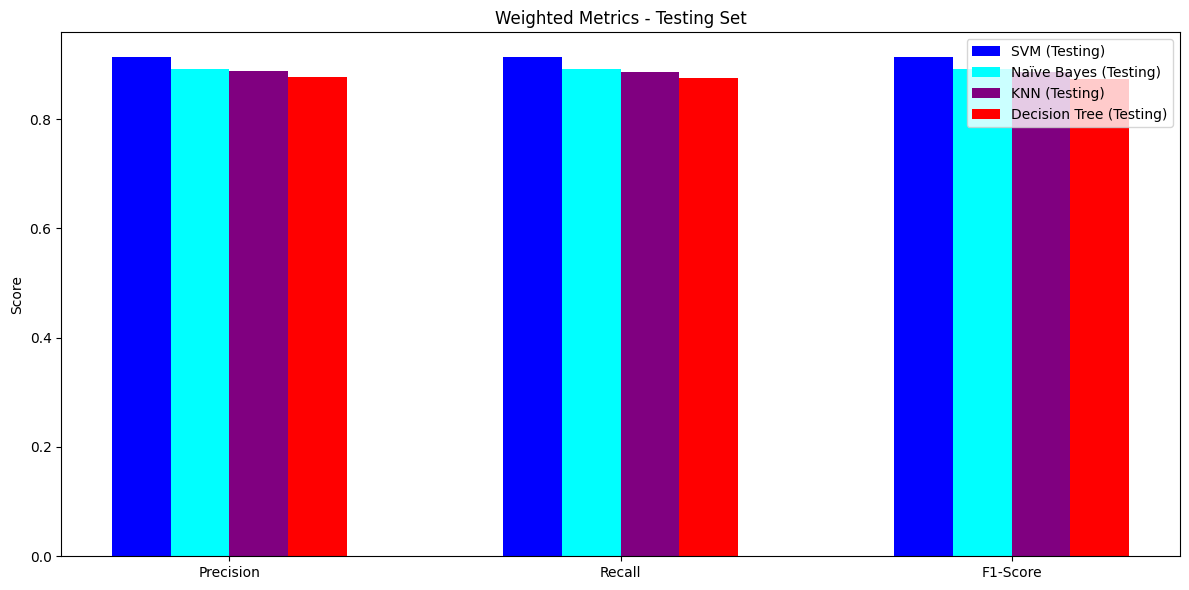

In [75]:
plt.figure(figsize=(12, 6))
plt.bar(x - 1.5 * width, svm_test_metrics, width, label="SVM (Testing)", color='blue')
plt.bar(x - 0.5 * width, nb_test_metrics, width, label="Naïve Bayes (Testing)", color='cyan')
plt.bar(x + 0.5 * width, knn_test_metrics, width, label="KNN (Testing)", color='purple')
plt.bar(x + 1.5 * width, dt_test_metrics, width, label="Decision Tree (Testing)", color='red')

plt.ylabel("Score")
plt.title("Weighted Metrics - Testing Set")
plt.xticks(x, x_labels)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Dendogram

### Function to Plot Dendogram

In [76]:
def plot_dendrogram(X, method):
    # Compute the linkage matrix for hierarchical clustering
    linkage_matrix = linkage(X, method=method)

    # Plot the dendrogram
    plt.figure(figsize=(10, 6))
    plt.title(f'Hierarchical Clustering Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Data Points or Clusters')
    plt.ylabel('Dissimilarity (Distance)')

    # Create the dendrogram plot with truncated visualization for simplicity
    dendrogram(
        linkage_matrix,
        truncate_mode='level',  # Limit the levels of hierarchy shown
        p=5,                    # Show top 5 levels
        leaf_rotation=90,       # Rotate leaf labels for better readability
        leaf_font_size=10,      # Font size for leaf labels
        show_contracted=True    # Contract large branches for readability
    )
    plt.show()
    
    return linkage_matrix

### Single linkage dendogram

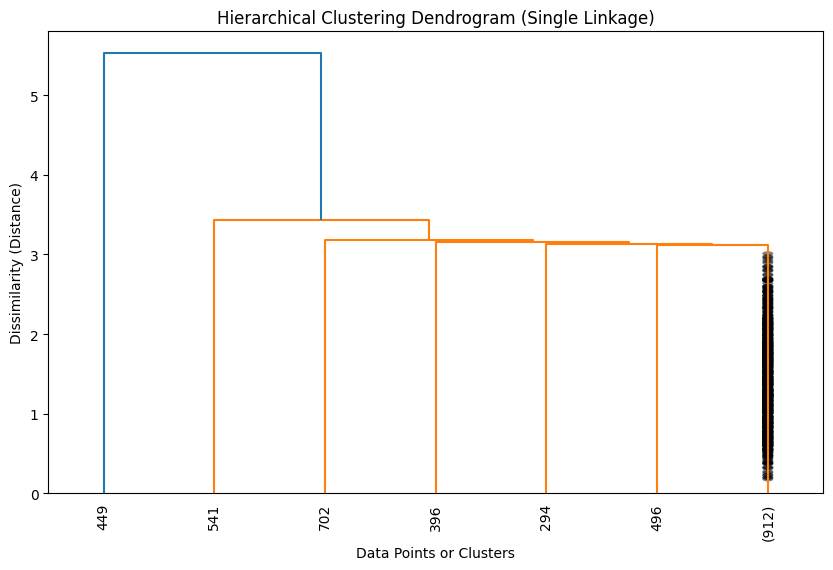

In [77]:
single_linkage = plot_dendrogram(X, 'single')

### Complete linkage dendogram

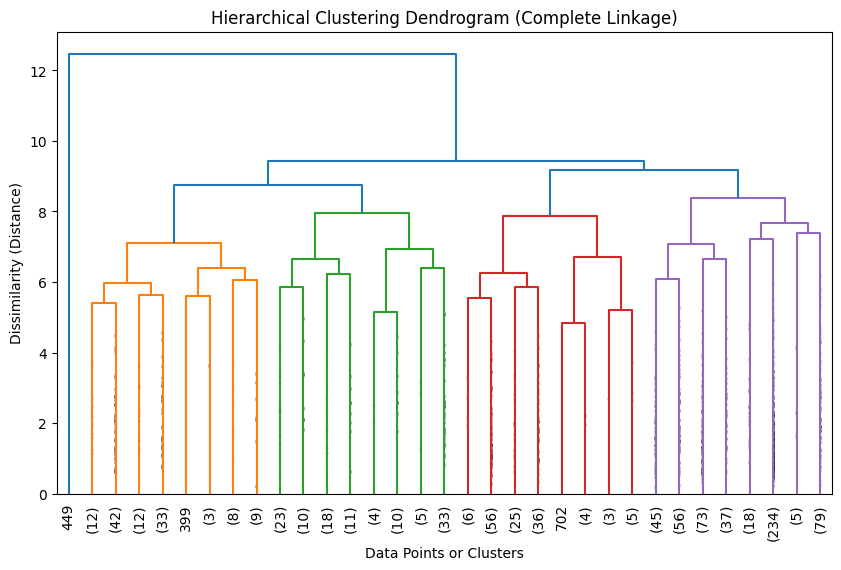

In [78]:
complete_linkage = plot_dendrogram(X, 'complete')

### Average linkage dendogram

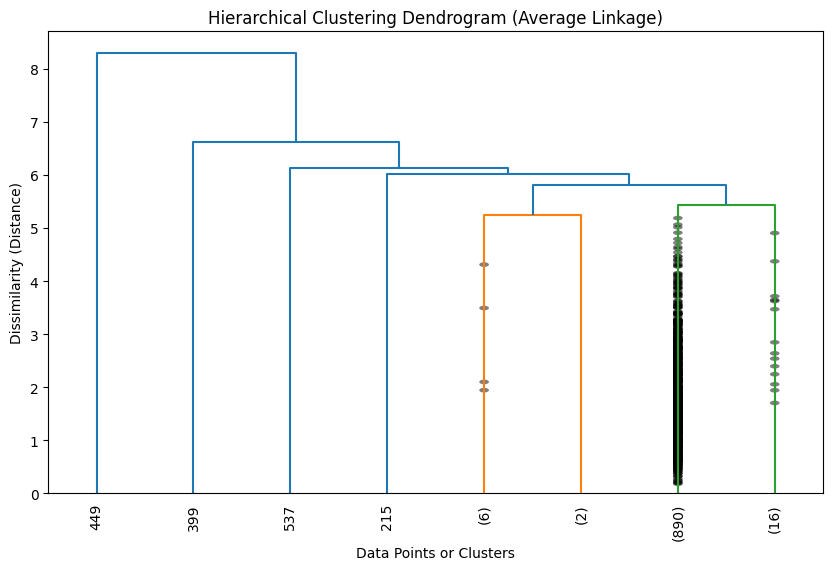

In [79]:
avg_linkage = plot_dendrogram(X, 'average')

### Centroid linkage dendogram

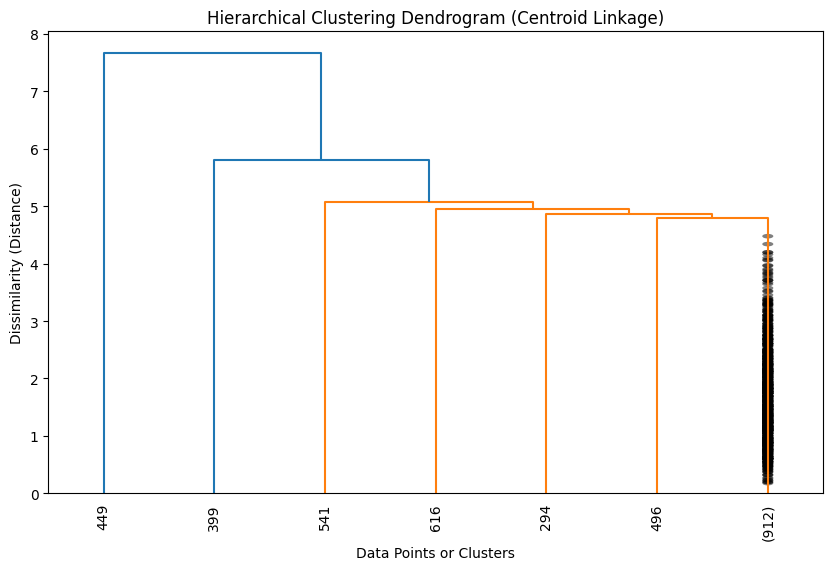

In [80]:
centroid_linkage = plot_dendrogram(X, 'centroid')

### Ward linkage dendogram

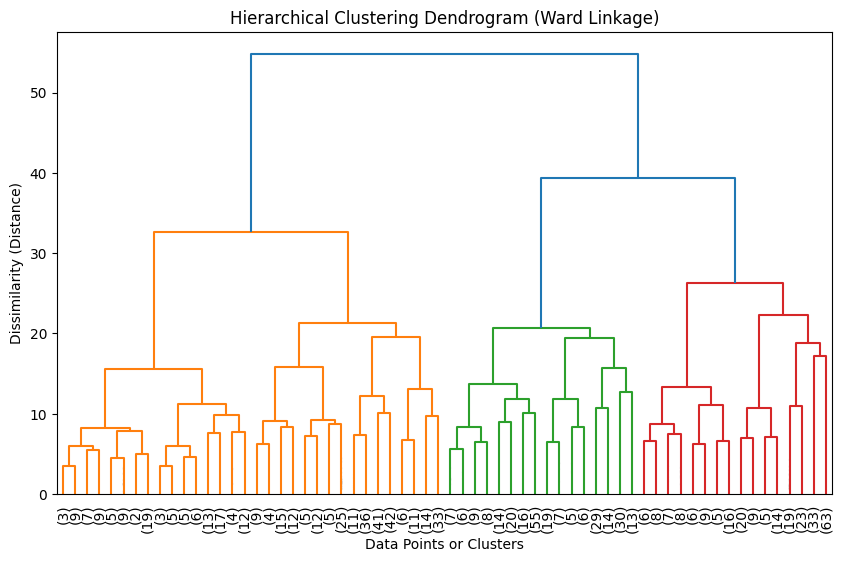

In [81]:
ward_linkage = plot_dendrogram(X, 'ward')

### Function to compare clusters with target column

In [82]:
# Add cluster labels and target labels to a DataFrame for comparison
def compare_clusters_with_target(cluster_labels):
    comparison_df = pd.DataFrame({
        'Cluster': cluster_labels,
        'Target': y
    })

    # Evaluate clustering performance
    # Count the number of data points in each cluster-target combination
    cluster_target_counts = comparison_df.groupby(['Cluster', 'Target']).size().unstack(fill_value=0)

    print("Cluster vs. Target Comparison:")
    print(cluster_target_counts)

    # Visualize the comparison
    cluster_target_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title('Cluster vs. Target Distribution')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title='Target')
    plt.show()

### Plot histogram to compare result clusters with target column

In [83]:
num_clusters = 2
# yes, no

#### Single Linkage

Cluster vs. Target Comparison:
Target    No  Yes
Cluster          
1        410  507
2          0    1


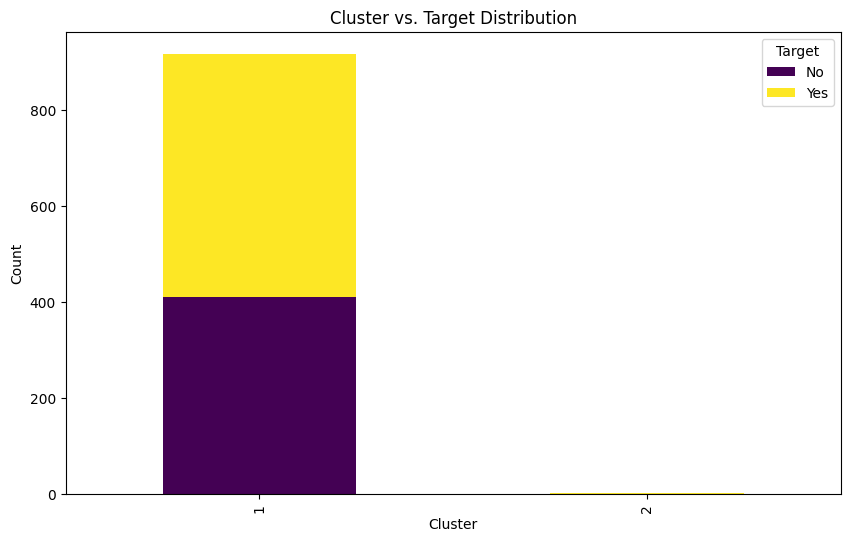

In [84]:
# Perform hierarchical clustering to get cluster labels using single linkage method
cluster_labels_Single = fcluster(single_linkage, num_clusters, criterion='maxclust')

# Compare the clusters with the actual target labels and visualize the distribution
compare_clusters_with_target(cluster_labels_Single)

#### Complete Linkage

Cluster vs. Target Comparison:
Target    No  Yes
Cluster          
1        410  507
2          0    1


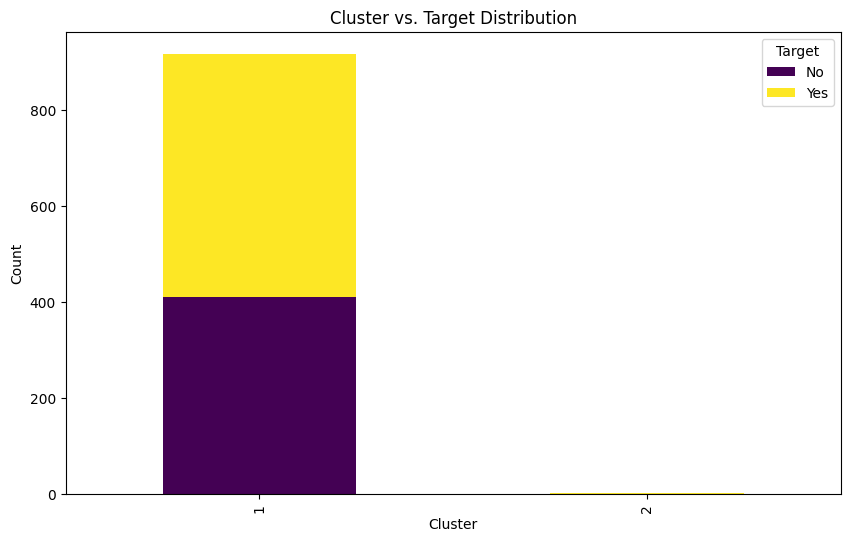

In [85]:
# Perform hierarchical clustering to get cluster labels using complete linkage method
cluster_labels_complete = fcluster(complete_linkage, num_clusters, criterion='maxclust')

# Compare the clusters with the actual target labels and visualize the distribution
compare_clusters_with_target(cluster_labels_complete)

#### Average Linkage

Cluster vs. Target Comparison:
Target    No  Yes
Cluster          
1        410  507
2          0    1


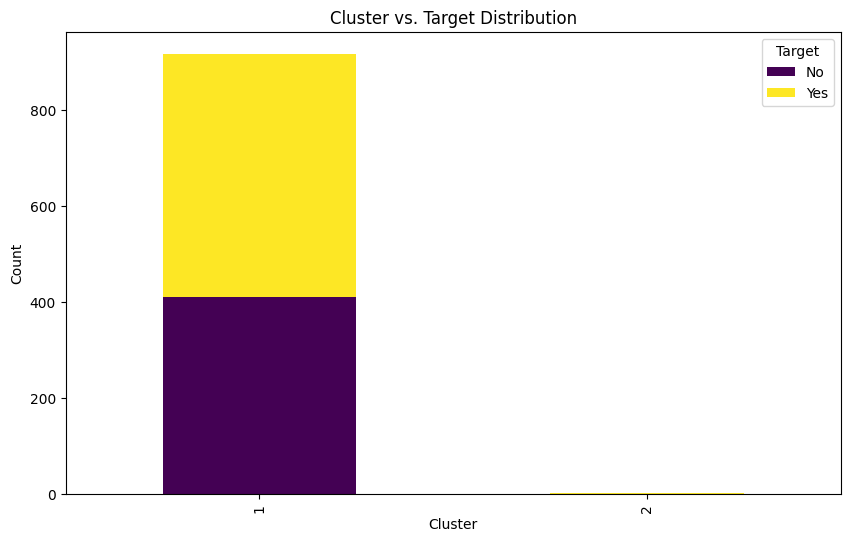

In [86]:
# Perform hierarchical clustering to get cluster labels using average linkage method
cluster_labels_average = fcluster(avg_linkage, num_clusters, criterion='maxclust')

# Compare the clusters with the actual target labels and visualize the distribution
compare_clusters_with_target(cluster_labels_average)

#### Centroid Linkage

Cluster vs. Target Comparison:
Target    No  Yes
Cluster          
1        410  507
2          0    1


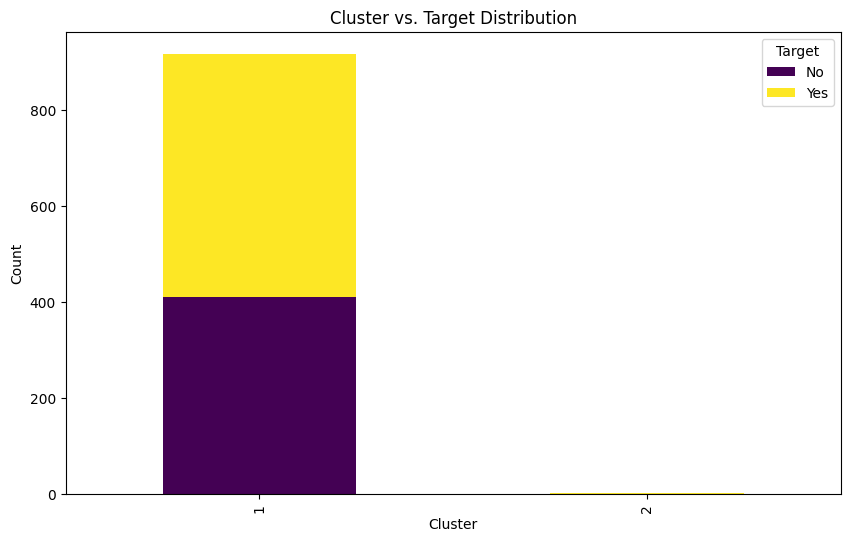

In [87]:
# Perform hierarchical clustering to get cluster labels using centroid linkage method
cluster_labels_centroid = fcluster(centroid_linkage, num_clusters, criterion='maxclust')

# Compare the clusters with the actual target labels and visualize the distribution
compare_clusters_with_target(cluster_labels_centroid)

#### Ward Linkage

Cluster vs. Target Comparison:
Target    No  Yes
Cluster          
1        307  102
2        103  406


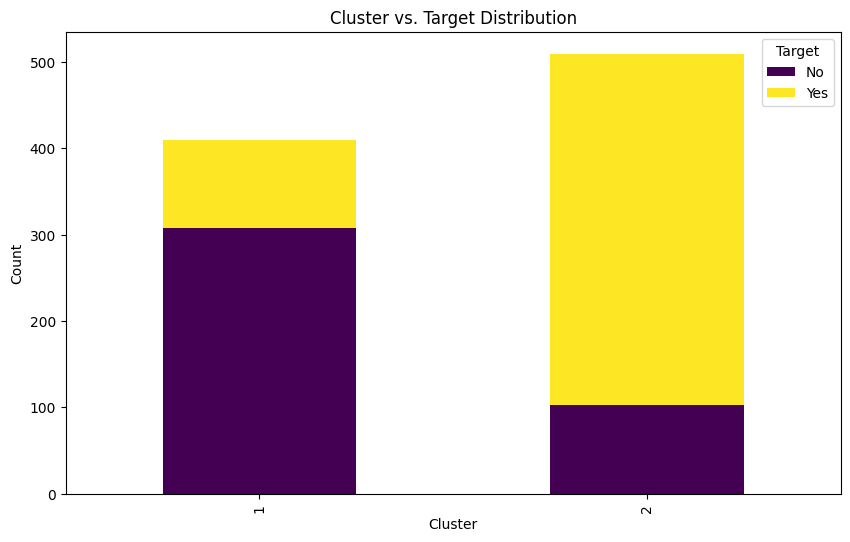

In [88]:
# Perform hierarchical clustering to get cluster labels using ward linkage method
cluster_labels_ward = fcluster(ward_linkage, num_clusters, criterion='maxclust')

# Compare the clusters with the actual target labels and visualize the distribution
compare_clusters_with_target(cluster_labels_ward)